In [1]:
import os
os.chdir("..")

In [2]:
from utils import *
from keras.models import load_model

In [3]:
folder = "A-Moller sim"

for n_file in range(1, 42 + 1):
    Ia_phot_anais = f"{folder}/Ia/DES_Ia-{n_file:04d}_PHOT.FITS"
    Ia_head_anais = f"{folder}/Ia/DES_Ia-{n_file:04d}_HEAD.FITS"

    nonIa_phot_anais = f"{folder}/nonIa/DES_NONIa-{n_file:04d}_PHOT.FITS"
    nonIa_head_anais = f"{folder}/nonIa/DES_NONIa-{n_file:04d}_HEAD.FITS"

    Ia_Moller_preprocess = preprocess(Ia_phot_anais, head_file=Ia_head_anais,
                                      band='FLT', normalize=True)

    nonIa_Moller_preprocess = preprocess(nonIa_phot_anais, head_file=nonIa_head_anais,
                                         band='FLT', normalize=True)

    if n_file == 1:
        curves_Moller = pd.concat((Ia_Moller_preprocess, nonIa_Moller_preprocess),
                                  ignore_index=True)
        continue
    curves_Moller = pd.concat((curves_Moller, Ia_Moller_preprocess, nonIa_Moller_preprocess),
                              ignore_index=True)


c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed 

In [4]:
types_Moller = [1 if j < len(Ia_Moller_preprocess) else 0
         for j in range(len(curves_Moller))]
curves_Moller['Type'] = types_Moller

In [5]:
curves_RNN_Moller, types_RNN_Moller = RNN_reshape(curves_Moller)

In [10]:
model_file = "data_folder/model_1bl_4LSTM.keras"
best_model = load_model(f"./{model_file}")

In [11]:
model_predict_Moller = best_model.predict(curves_RNN_Moller)

60399/60399 [==============================] - 442s 7ms/step


In [13]:
nan_index_Moller = np.argwhere(np.isnan(model_predict_Moller))
print(f"#NaN values: {nan_index_Moller.size}")
print(f"#lightcurves: {model_predict_Moller.size}")

mask = np.ones(model_predict_Moller.shape, dtype=bool)
mask[nan_index_Moller] = False

#NaN values: 19802
#lightcurves: 1932767


Normalized confusion matrix


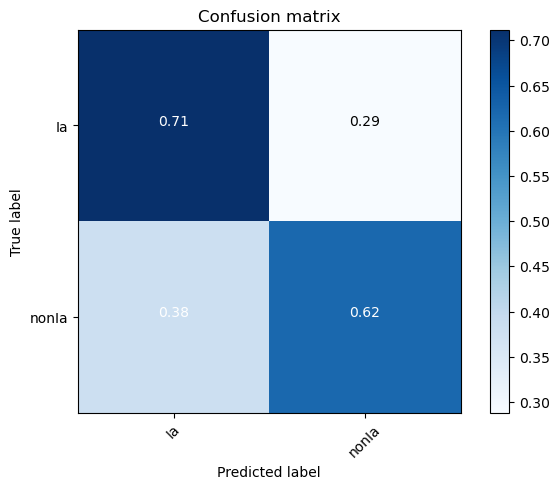

In [14]:
plot_confusion_matrix(types_RNN_Moller[mask],
                      model_predict_Moller[mask].round(),
                      ['Ia', 'nonIa'], normalize=True)

# My data

In [3]:
Ia_phot = "Lightcurves\curves\Ia\DES\DES_Ia_PHOT.FITS"
Ia_head = "Lightcurves\curves\Ia\DES\DES_Ia_HEAD.FITS"

nonIa_phot = "Lightcurves\curves/nonIa\DES\DES_nonIa_PHOT.FITS"
nonIa_head = "Lightcurves\curves/nonIa\DES\DES_nonIa_HEAD.FITS"

Ia_preprocess = preprocess(Ia_phot, head_file=Ia_head, normalize=True)
nonIa_preprocess = preprocess(nonIa_phot, head_file=nonIa_head, normalize=True)

curves = pd.concat((Ia_preprocess, nonIa_preprocess), ignore_index=True)

c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [4]:
types = [1 if j < len(Ia_preprocess) else 0
         for j in range(len(curves))]
curves['Type'] = types

In [5]:
curves_RNN, types_RNN = RNN_reshape(curves)

In [6]:
model_file = "data_folder\model_1bl_4LSTM.keras"
best_model = load_model(f"./{model_file}")

In [7]:
model_predict = best_model.predict(curves_RNN)

6198/6198 [==============================] - 31s 5ms/step


In [8]:
nan_index = np.argwhere(np.isnan(model_predict))
print(f"#NaN values: {nan_index.size}")

mask = np.ones(model_predict.shape, dtype=bool)
mask[nan_index] = False

#NaN values: 0


Normalized confusion matrix


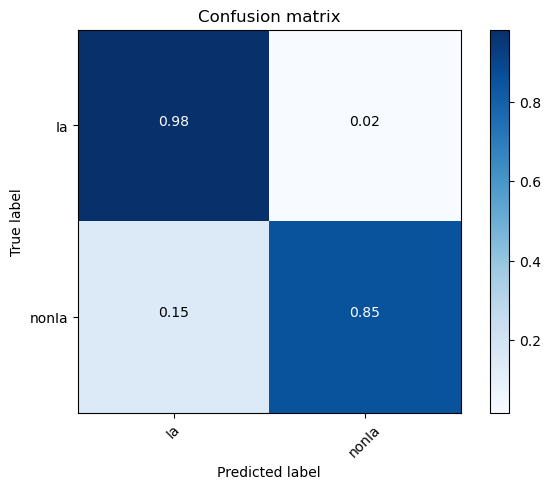

In [9]:
plot_confusion_matrix(types_RNN[mask], model_predict[mask].round(),
                      ['Ia', 'nonIa'], normalize=True)